In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader,Dataset
import torch.optim
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
from torchvision.models import AlexNet,resnet50
import torch.optim as optim

In [2]:
df = pd.read_csv('train.csv')
print(df)

             image_id  label
0      1000015157.jpg      0
1      1000201771.jpg      3
2       100042118.jpg      1
3      1000723321.jpg      1
4      1000812911.jpg      3
...               ...    ...
21392   999068805.jpg      3
21393   999329392.jpg      3
21394   999474432.jpg      1
21395   999616605.jpg      4
21396   999998473.jpg      4

[21397 rows x 2 columns]


<Axes: xlabel='label'>

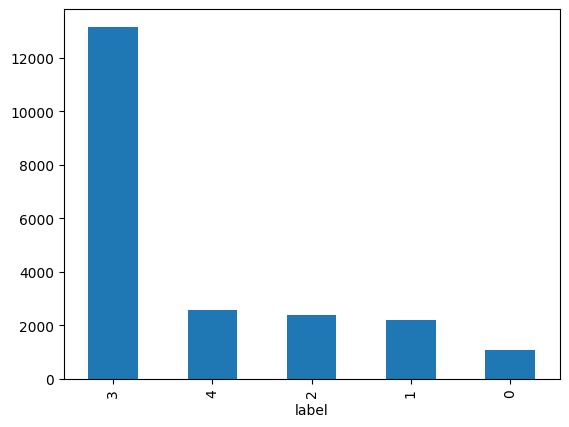

In [3]:
df['label'].value_counts().plot(kind='bar')

In [4]:
class CustomDataset(Dataset):
    def __init__(self,id,labels,transform=None):
        self.id = id
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.id)
    
    def __getitem__(self,idx):
        img = self.id[idx]
        img = Image.open(f'train_images/{img}')
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img,label
    

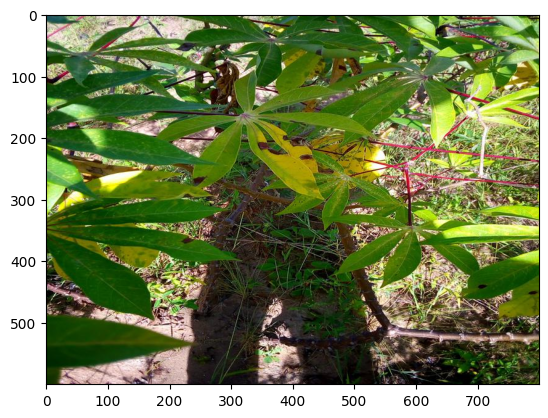

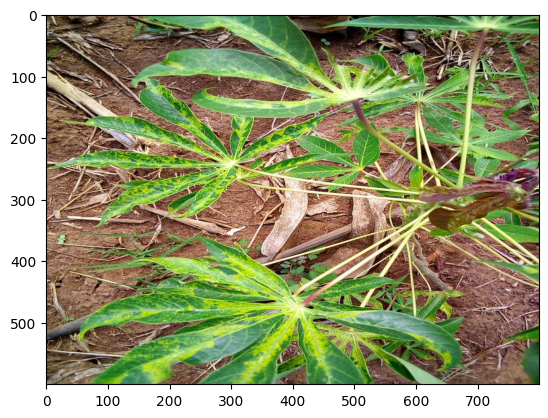

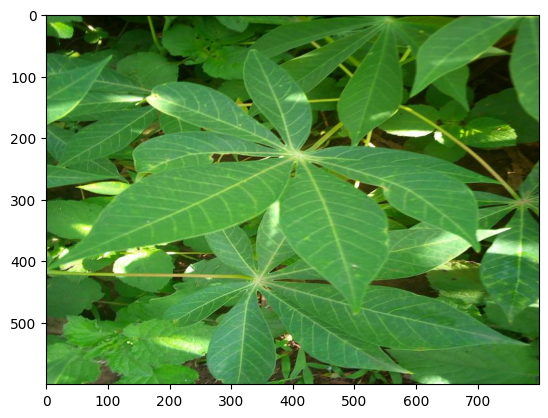

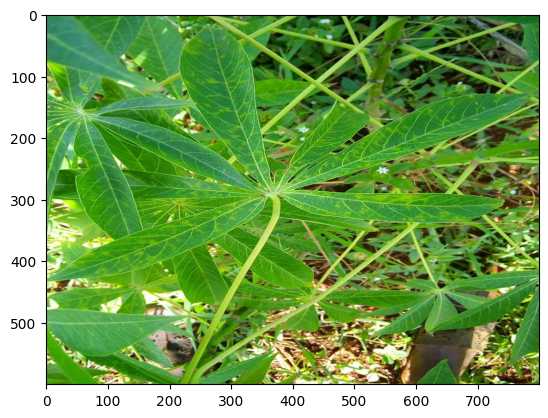

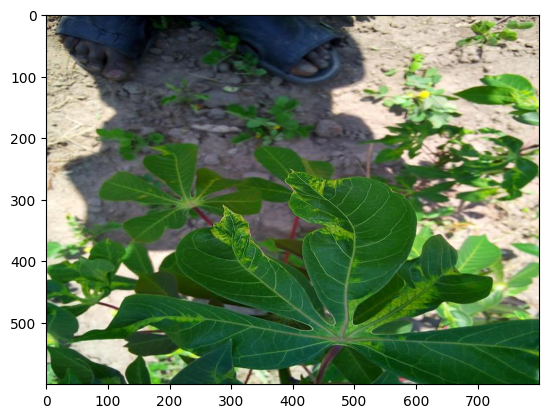

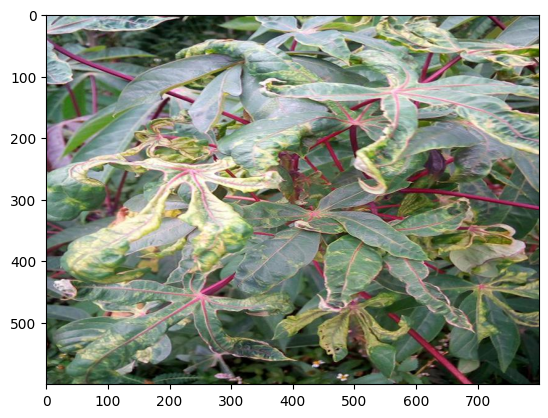

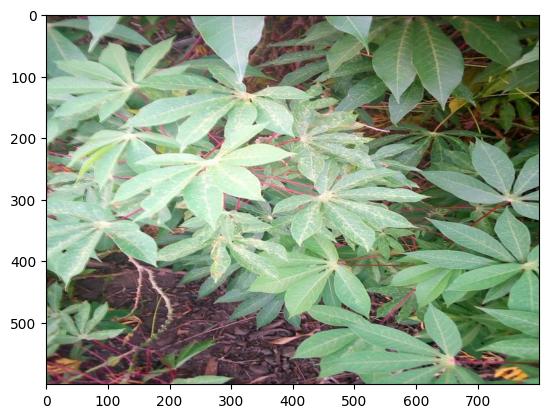

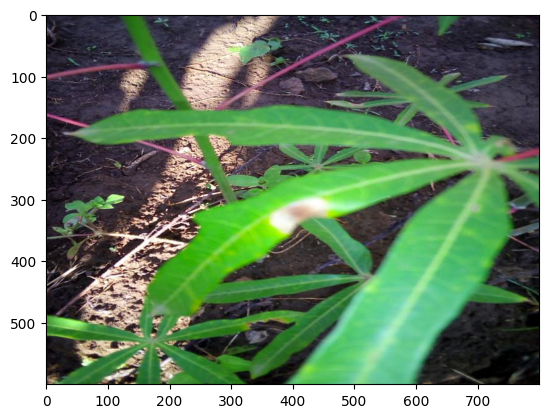

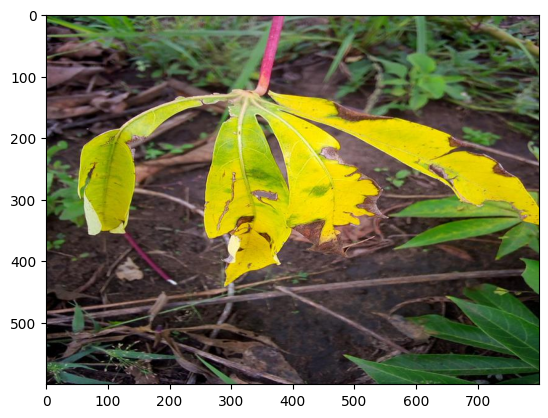

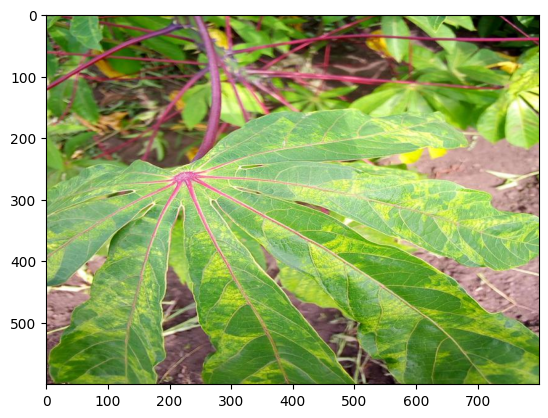

KeyError: 10

In [22]:
# dataset = CustomDataset(df['image_id'].head(10),df['label'].head(10))
# for c,_ in dataset:
#     plt.imshow(c)
#     plt.show()

In [7]:

result = df.head(15).groupby('label')['image_id'].apply(list).reset_index()
print(result['image_id'][1])

['100042118.jpg', '1000723321.jpg', '1002088496.jpg']


In [19]:
# for c in result['image_id']:
#     print(c[0])
#     resutl = Image.open(f'train_images/{c[0]}')
#     plt.imshow(resutl)
#     plt.show()

In [28]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet ожидает вход размером 224x224
    transforms.ToTensor(),  # Конвертируем в тензор
])

In [29]:
setdata = CustomDataset(df['image_id'],df['label'],transform)
train_loader = DataLoader(setdata,batch_size=28, shuffle=True)

In [30]:
model = resnet50(pretrained=False)

model.fc = nn.Linear(model.fc.in_features,5)

In [31]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=1e-10, alpha=0.4, eps=1e-8, weight_decay=0)

In [36]:
from tqdm import tqdm
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_classes = 0  # Общее количество классов везде, где есть метки
    
    for batch_idx, (inputs, labels) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}')):
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Здесь мы будем считать точность
        # Предположим, что outputs - это логиты, и нужно применить softmax
    
        # print(outputs)
        
        print(f'Loss: {len(train_loader) / running_loss}', end='\r')

Epoch 1:   0%|                                                                       | 1/765 [00:19<4:07:10, 19.41s/it]

Epoch 1:   0%|▏                                                                      | 2/765 [00:37<3:56:13, 18.58s/it]

Epoch 1:   0%|▎                                                                      | 3/765 [00:55<3:53:52, 18.42s/it]

Epoch 1:   1%|▎                                                                      | 4/765 [01:13<3:52:24, 18.32s/it]

Epoch 1:   1%|▍                                                                      | 5/765 [01:31<3:49:23, 18.11s/it]

Epoch 1:   1%|▌                                                                      | 6/765 [01:49<3:48:41, 18.08s/it]

Epoch 1:   1%|▋                                                                      | 7/765 [02:07<3:46:04, 17.89s/it]

Epoch 1:   1%|▋                                                                      | 8/765 [02:24<3:44:59, 17.83s/it]

Epoch 1:   1%|▊                                                                      | 9/765 [02:42<3:44:24, 17.81s/it]

Epoch 1:   1%|▉                                                                     | 10/765 [02:59<3:42:32, 17.68s/it]

Epoch 1:   1%|█                                                                     | 11/765 [03:17<3:42:54, 17.74s/it]

Epoch 1:   2%|█                                                                     | 12/765 [03:35<3:43:45, 17.83s/it]

Epoch 1:   2%|█▏                                                                    | 13/765 [03:53<3:43:40, 17.85s/it]

Epoch 1:   2%|█▎                                                                    | 14/765 [04:11<3:44:49, 17.96s/it]

Epoch 1:   2%|█▎                                                                    | 15/765 [04:29<3:43:47, 17.90s/it]

Epoch 1:   2%|█▍                                                                    | 16/765 [04:47<3:42:39, 17.84s/it]

Epoch 1:   2%|█▌                                                                    | 17/765 [05:05<3:42:47, 17.87s/it]

Epoch 1:   2%|█▋                                                                    | 18/765 [05:23<3:43:16, 17.93s/it]

Epoch 1:   2%|█▋                                                                    | 19/765 [05:41<3:42:51, 17.92s/it]

Epoch 1:   3%|█▊                                                                    | 20/765 [05:58<3:41:09, 17.81s/it]

Epoch 1:   3%|█▉                                                                    | 21/765 [06:16<3:41:29, 17.86s/it]

Epoch 1:   3%|██                                                                    | 22/765 [06:34<3:40:57, 17.84s/it]

Epoch 1:   3%|██                                                                    | 23/765 [06:52<3:42:13, 17.97s/it]

Epoch 1:   3%|██▏                                                                   | 24/765 [07:10<3:40:30, 17.85s/it]

Epoch 1:   3%|██▎                                                                   | 25/765 [07:28<3:40:59, 17.92s/it]

Epoch 1:   3%|██▍                                                                   | 26/765 [07:46<3:39:41, 17.84s/it]

Epoch 1:   4%|██▍                                                                   | 27/765 [08:04<3:39:48, 17.87s/it]

Epoch 1:   4%|██▌                                                                   | 28/765 [08:22<3:41:38, 18.04s/it]

Epoch 1:   4%|██▋                                                                   | 29/765 [08:41<3:43:56, 18.26s/it]

Epoch 1:   4%|██▋                                                                   | 30/765 [08:59<3:44:37, 18.34s/it]

Epoch 1:   4%|██▊                                                                   | 31/765 [09:18<3:46:24, 18.51s/it]

Epoch 1:   4%|██▉                                                                   | 32/765 [09:37<3:46:51, 18.57s/it]

Epoch 1:   4%|███                                                                   | 33/765 [09:56<3:47:01, 18.61s/it]

Epoch 1:   4%|███                                                                   | 34/765 [10:14<3:45:38, 18.52s/it]

Epoch 1:   5%|███▏                                                                  | 35/765 [10:33<3:45:40, 18.55s/it]

Epoch 1:   5%|███▎                                                                  | 36/765 [10:51<3:44:53, 18.51s/it]

Epoch 1:   5%|███▍                                                                  | 37/765 [11:09<3:44:15, 18.48s/it]

Epoch 1:   5%|███▍                                                                  | 38/765 [11:28<3:45:37, 18.62s/it]

Epoch 1:   5%|███▌                                                                  | 39/765 [11:47<3:44:12, 18.53s/it]

Epoch 1:   5%|███▋                                                                  | 40/765 [12:05<3:44:34, 18.59s/it]

Epoch 1:   5%|███▊                                                                  | 41/765 [12:24<3:44:54, 18.64s/it]

Epoch 1:   5%|███▊                                                                  | 42/765 [12:43<3:44:27, 18.63s/it]

Epoch 1:   6%|███▉                                                                  | 43/765 [13:02<3:44:56, 18.69s/it]

Epoch 1:   6%|████                                                                  | 44/765 [13:21<3:45:58, 18.81s/it]

Epoch 1:   6%|████                                                                  | 45/765 [13:39<3:44:59, 18.75s/it]

Epoch 1:   6%|████▏                                                                 | 46/765 [13:58<3:43:06, 18.62s/it]

Epoch 1:   6%|████▎                                                                 | 47/765 [14:16<3:43:16, 18.66s/it]

Epoch 1:   6%|████▍                                                                 | 48/765 [14:35<3:42:37, 18.63s/it]

Epoch 1:   6%|████▍                                                                 | 49/765 [14:54<3:42:01, 18.61s/it]

Epoch 1:   7%|████▌                                                                 | 50/765 [15:12<3:41:52, 18.62s/it]

Epoch 1:   7%|████▋                                                                 | 51/765 [15:30<3:40:18, 18.51s/it]

Epoch 1:   7%|████▊                                                                 | 52/765 [15:42<3:14:34, 16.37s/it]

Epoch 1:   7%|████▊                                                                 | 53/765 [15:53<2:54:48, 14.73s/it]

Epoch 1:   7%|████▉                                                                 | 54/765 [16:03<2:39:53, 13.49s/it]

Epoch 1:   7%|█████                                                                 | 55/765 [16:14<2:29:58, 12.67s/it]

Epoch 1:   7%|█████                                                                 | 56/765 [16:25<2:24:00, 12.19s/it]

Epoch 1:   7%|█████▏                                                                | 57/765 [16:36<2:19:00, 11.78s/it]

Epoch 1:   8%|█████▎                                                                | 58/765 [16:47<2:14:27, 11.41s/it]

Epoch 1:   8%|█████▍                                                                | 59/765 [16:57<2:11:20, 11.16s/it]

Epoch 1:   8%|█████▍                                                                | 60/765 [17:08<2:09:17, 11.00s/it]

Epoch 1:   8%|█████▌                                                                | 61/765 [17:18<2:07:55, 10.90s/it]

Epoch 1:   8%|█████▋                                                                | 62/765 [17:30<2:09:15, 11.03s/it]

Epoch 1:   8%|█████▊                                                                | 63/765 [17:41<2:08:50, 11.01s/it]

Epoch 1:   8%|█████▊                                                                | 64/765 [17:51<2:07:40, 10.93s/it]

Epoch 1:   8%|█████▉                                                                | 65/765 [18:03<2:09:36, 11.11s/it]

Epoch 1:   9%|██████                                                                | 66/765 [18:14<2:09:33, 11.12s/it]

Epoch 1:   9%|██████▏                                                               | 67/765 [18:25<2:08:18, 11.03s/it]

Epoch 1:   9%|██████▏                                                               | 68/765 [18:36<2:09:07, 11.12s/it]

Epoch 1:   9%|██████▎                                                               | 69/765 [18:48<2:10:09, 11.22s/it]

Epoch 1:   9%|██████▍                                                               | 70/765 [19:00<2:13:46, 11.55s/it]

Epoch 1:   9%|██████▍                                                               | 71/765 [19:12<2:15:50, 11.74s/it]

Epoch 1:   9%|██████▌                                                               | 72/765 [19:25<2:18:43, 12.01s/it]

Epoch 1:  10%|██████▋                                                               | 73/765 [19:37<2:19:17, 12.08s/it]

Epoch 1:  10%|██████▊                                                               | 74/765 [19:49<2:19:55, 12.15s/it]

Epoch 1:  10%|██████▊                                                               | 75/765 [20:02<2:20:17, 12.20s/it]

Epoch 1:  10%|██████▉                                                               | 76/765 [20:14<2:19:51, 12.18s/it]

Epoch 1:  10%|███████                                                               | 77/765 [20:26<2:18:07, 12.05s/it]

Epoch 1:  10%|███████▏                                                              | 78/765 [20:38<2:17:49, 12.04s/it]

Epoch 1:  10%|███████▏                                                              | 79/765 [20:50<2:17:36, 12.04s/it]

Epoch 1:  10%|███████▎                                                              | 80/765 [21:02<2:19:31, 12.22s/it]

Epoch 1:  11%|███████▍                                                              | 81/765 [21:15<2:19:37, 12.25s/it]

Epoch 1:  11%|███████▌                                                              | 82/765 [21:27<2:18:27, 12.16s/it]

Epoch 1:  11%|███████▌                                                              | 83/765 [21:38<2:16:50, 12.04s/it]

Epoch 1:  11%|███████▋                                                              | 84/765 [21:50<2:14:55, 11.89s/it]

Epoch 1:  11%|███████▊                                                              | 85/765 [22:02<2:16:10, 12.02s/it]

Epoch 1:  11%|███████▊                                                              | 86/765 [22:14<2:15:04, 11.94s/it]

Epoch 1:  11%|███████▉                                                              | 87/765 [22:25<2:13:16, 11.79s/it]

Epoch 1:  12%|████████                                                              | 88/765 [22:37<2:12:59, 11.79s/it]

Epoch 1:  12%|████████▏                                                             | 89/765 [22:50<2:15:05, 11.99s/it]

Epoch 1:  12%|████████▏                                                             | 90/765 [23:03<2:18:17, 12.29s/it]

Epoch 1:  12%|████████▎                                                             | 91/765 [23:17<2:25:11, 12.93s/it]

Epoch 1:  12%|████████▍                                                             | 92/765 [23:32<2:30:53, 13.45s/it]

Epoch 1:  12%|████████▌                                                             | 93/765 [23:45<2:30:46, 13.46s/it]

Epoch 1:  12%|████████▌                                                             | 94/765 [23:59<2:30:10, 13.43s/it]

Epoch 1:  12%|████████▋                                                             | 95/765 [24:11<2:26:59, 13.16s/it]

Epoch 1:  13%|████████▊                                                             | 96/765 [24:23<2:24:10, 12.93s/it]

Epoch 1:  13%|████████▉                                                             | 97/765 [24:36<2:21:27, 12.71s/it]

Epoch 1:  13%|████████▉                                                             | 98/765 [24:48<2:18:25, 12.45s/it]

Epoch 1:  13%|█████████                                                             | 99/765 [24:59<2:15:07, 12.17s/it]

Epoch 1:  13%|█████████                                                            | 100/765 [25:10<2:10:54, 11.81s/it]

Epoch 1:  13%|█████████                                                            | 101/765 [25:21<2:07:54, 11.56s/it]

Epoch 1:  13%|█████████▏                                                           | 102/765 [25:33<2:09:50, 11.75s/it]

Epoch 1:  13%|█████████▎                                                           | 103/765 [25:46<2:14:03, 12.15s/it]

Epoch 1:  14%|█████████▍                                                           | 104/765 [26:01<2:23:59, 13.07s/it]

Epoch 1:  14%|█████████▍                                                           | 105/765 [26:17<2:30:34, 13.69s/it]

Epoch 1:  14%|█████████▌                                                           | 106/765 [26:31<2:34:00, 14.02s/it]

Epoch 1:  14%|█████████▋                                                           | 107/765 [26:46<2:34:18, 14.07s/it]

Epoch 1:  14%|█████████▋                                                           | 108/765 [26:59<2:32:37, 13.94s/it]

Epoch 1:  14%|█████████▊                                                           | 109/765 [27:12<2:29:02, 13.63s/it]

Epoch 1:  14%|█████████▉                                                           | 110/765 [27:25<2:25:49, 13.36s/it]

Epoch 1:  15%|██████████                                                           | 111/765 [27:37<2:22:18, 13.06s/it]

Epoch 1:  15%|██████████                                                           | 112/765 [27:49<2:18:18, 12.71s/it]

Epoch 1:  15%|██████████▏                                                          | 113/765 [28:01<2:16:42, 12.58s/it]

Epoch 1:  15%|██████████▎                                                          | 114/765 [28:14<2:15:18, 12.47s/it]

Epoch 1:  15%|██████████▎                                                          | 115/765 [28:26<2:15:18, 12.49s/it]

Epoch 1:  15%|██████████▍                                                          | 116/765 [28:40<2:18:09, 12.77s/it]

Epoch 1:  15%|██████████▌                                                          | 117/765 [28:54<2:24:11, 13.35s/it]

Epoch 1:  15%|██████████▋                                                          | 118/765 [29:09<2:28:03, 13.73s/it]

Epoch 1:  16%|██████████▋                                                          | 119/765 [29:23<2:27:43, 13.72s/it]

Epoch 1:  16%|██████████▊                                                          | 120/765 [29:36<2:26:18, 13.61s/it]

Epoch 1:  16%|██████████▉                                                          | 121/765 [29:49<2:23:18, 13.35s/it]

Epoch 1:  16%|███████████                                                          | 122/765 [30:01<2:20:43, 13.13s/it]

Epoch 1:  16%|███████████                                                          | 123/765 [30:13<2:17:14, 12.83s/it]

Epoch 1:  16%|███████████▏                                                         | 124/765 [30:26<2:14:48, 12.62s/it]

Epoch 1:  16%|███████████▎                                                         | 125/765 [30:38<2:13:08, 12.48s/it]

Epoch 1:  16%|███████████▎                                                         | 126/765 [30:51<2:16:28, 12.81s/it]

Epoch 1:  17%|███████████▍                                                         | 127/765 [31:06<2:22:53, 13.44s/it]

Epoch 1:  17%|███████████▌                                                         | 128/765 [31:21<2:26:37, 13.81s/it]

Epoch 1:  17%|███████████▋                                                         | 129/765 [31:35<2:28:03, 13.97s/it]

Epoch 1:  17%|███████████▋                                                         | 130/765 [31:48<2:24:48, 13.68s/it]

Epoch 1:  17%|███████████▊                                                         | 131/765 [32:01<2:22:24, 13.48s/it]

Epoch 1:  17%|███████████▉                                                         | 132/765 [32:13<2:17:43, 13.05s/it]

Epoch 1:  17%|███████████▉                                                         | 133/765 [32:26<2:15:00, 12.82s/it]

Epoch 1:  18%|████████████                                                         | 134/765 [32:38<2:12:04, 12.56s/it]

Epoch 1:  18%|████████████▏                                                        | 135/765 [32:50<2:10:52, 12.46s/it]

Epoch 1:  18%|████████████▎                                                        | 136/765 [33:03<2:12:58, 12.68s/it]

Epoch 1:  18%|████████████▎                                                        | 137/765 [33:18<2:18:53, 13.27s/it]

Epoch 1:  18%|████████████▍                                                        | 138/765 [33:33<2:24:39, 13.84s/it]

Epoch 1:  18%|████████████▌                                                        | 139/765 [33:47<2:24:06, 13.81s/it]

Epoch 1:  18%|████████████▋                                                        | 140/765 [34:00<2:24:10, 13.84s/it]

Epoch 1:  18%|████████████▋                                                        | 141/765 [34:13<2:21:22, 13.59s/it]

Epoch 1:  19%|████████████▊                                                        | 142/765 [34:26<2:17:44, 13.27s/it]

Epoch 1:  19%|████████████▉                                                        | 143/765 [34:38<2:14:43, 13.00s/it]

Epoch 1:  19%|████████████▉                                                        | 144/765 [34:51<2:12:33, 12.81s/it]

Epoch 1:  19%|█████████████                                                        | 145/765 [35:03<2:10:39, 12.64s/it]

Epoch 1:  19%|█████████████▏                                                       | 146/765 [35:15<2:09:04, 12.51s/it]

Epoch 1:  19%|█████████████▎                                                       | 147/765 [35:29<2:12:30, 12.87s/it]

Epoch 1:  19%|█████████████▎                                                       | 148/765 [35:44<2:19:09, 13.53s/it]

Epoch 1:  19%|█████████████▍                                                       | 149/765 [35:59<2:24:41, 14.09s/it]

Epoch 1:  20%|█████████████▌                                                       | 150/765 [36:14<2:27:02, 14.34s/it]

Epoch 1:  20%|█████████████▌                                                       | 151/765 [36:28<2:23:38, 14.04s/it]

Epoch 1:  20%|█████████████▋                                                       | 152/765 [36:40<2:18:56, 13.60s/it]

Epoch 1:  20%|█████████████▊                                                       | 153/765 [36:53<2:15:12, 13.25s/it]

Epoch 1:  20%|█████████████▉                                                       | 154/765 [37:05<2:12:37, 13.02s/it]

Epoch 1:  20%|█████████████▉                                                       | 155/765 [37:17<2:08:55, 12.68s/it]

Epoch 1:  20%|██████████████                                                       | 156/765 [37:29<2:07:30, 12.56s/it]

Epoch 1:  21%|██████████████▏                                                      | 157/765 [37:42<2:07:51, 12.62s/it]

Epoch 1:  21%|██████████████▎                                                      | 158/765 [37:56<2:11:26, 12.99s/it]

Epoch 1:  21%|██████████████▎                                                      | 159/765 [38:11<2:17:36, 13.62s/it]

Epoch 1:  21%|██████████████▍                                                      | 160/765 [38:26<2:21:08, 14.00s/it]

Epoch 1:  21%|██████████████▌                                                      | 161/765 [38:40<2:20:24, 13.95s/it]

Epoch 1:  21%|██████████████▌                                                      | 162/765 [38:53<2:17:49, 13.71s/it]

Epoch 1:  21%|██████████████▋                                                      | 163/765 [39:06<2:15:14, 13.48s/it]

Epoch 1:  21%|██████████████▊                                                      | 164/765 [39:18<2:12:13, 13.20s/it]

Epoch 1:  22%|██████████████▉                                                      | 165/765 [39:31<2:09:12, 12.92s/it]

Epoch 1:  22%|██████████████▉                                                      | 166/765 [39:43<2:06:37, 12.68s/it]

Epoch 1:  22%|███████████████                                                      | 167/765 [39:55<2:04:42, 12.51s/it]

Epoch 1:  22%|███████████████▏                                                     | 168/765 [40:08<2:05:06, 12.57s/it]

Epoch 1:  22%|███████████████▏                                                     | 169/765 [40:21<2:08:21, 12.92s/it]

Epoch 1:  22%|███████████████▎                                                     | 170/765 [40:36<2:14:46, 13.59s/it]

Epoch 1:  22%|███████████████▍                                                     | 171/765 [40:51<2:18:13, 13.96s/it]

Epoch 1:  22%|███████████████▌                                                     | 172/765 [41:05<2:17:54, 13.95s/it]

Epoch 1:  23%|███████████████▌                                                     | 173/765 [41:18<2:15:17, 13.71s/it]

Epoch 1:  23%|███████████████▋                                                     | 174/765 [41:31<2:12:42, 13.47s/it]

Epoch 1:  23%|███████████████▊                                                     | 175/765 [41:44<2:09:54, 13.21s/it]

Epoch 1:  23%|███████████████▊                                                     | 176/765 [41:56<2:06:44, 12.91s/it]

Epoch 1:  23%|███████████████▉                                                     | 177/765 [42:08<2:02:59, 12.55s/it]

Epoch 1:  23%|████████████████                                                     | 178/765 [42:19<1:59:50, 12.25s/it]

Epoch 1:  23%|████████████████▏                                                    | 179/765 [42:31<1:59:08, 12.20s/it]

Epoch 1:  24%|████████████████▏                                                    | 180/765 [42:44<2:01:32, 12.47s/it]

Epoch 1:  24%|████████████████▎                                                    | 181/765 [42:59<2:07:53, 13.14s/it]

Epoch 1:  24%|████████████████▍                                                    | 182/765 [43:14<2:12:10, 13.60s/it]

Epoch 1:  24%|████████████████▌                                                    | 183/765 [43:29<2:14:56, 13.91s/it]

Epoch 1:  24%|████████████████▌                                                    | 184/765 [43:42<2:14:40, 13.91s/it]

Epoch 1:  24%|████████████████▋                                                    | 185/765 [43:56<2:12:26, 13.70s/it]

Epoch 1:  24%|████████████████▊                                                    | 186/765 [44:09<2:10:19, 13.51s/it]

Epoch 1:  24%|████████████████▊                                                    | 187/765 [44:21<2:07:25, 13.23s/it]

Epoch 1:  25%|████████████████▉                                                    | 188/765 [44:34<2:04:43, 12.97s/it]

Epoch 1:  25%|█████████████████                                                    | 189/765 [44:46<2:01:48, 12.69s/it]

Epoch 1:  25%|█████████████████▏                                                   | 190/765 [44:58<2:00:11, 12.54s/it]

Epoch 1:  25%|█████████████████▏                                                   | 191/765 [45:11<2:00:28, 12.59s/it]

Epoch 1:  25%|█████████████████▎                                                   | 192/765 [45:25<2:05:52, 13.18s/it]

Epoch 1:  25%|█████████████████▍                                                   | 193/765 [45:41<2:13:48, 14.04s/it]

Epoch 1:  25%|█████████████████▍                                                   | 194/765 [45:55<2:13:59, 14.08s/it]

Epoch 1:  25%|█████████████████▌                                                   | 195/765 [46:09<2:12:03, 13.90s/it]

Epoch 1:  26%|█████████████████▋                                                   | 196/765 [46:22<2:09:35, 13.67s/it]

Epoch 1:  26%|█████████████████▊                                                   | 197/765 [46:34<2:05:29, 13.26s/it]

Epoch 1:  26%|█████████████████▊                                                   | 198/765 [46:47<2:02:30, 12.96s/it]

Epoch 1:  26%|█████████████████▉                                                   | 199/765 [46:59<2:00:36, 12.78s/it]

Epoch 1:  26%|██████████████████                                                   | 200/765 [47:11<1:58:49, 12.62s/it]

Epoch 1:  26%|██████████████████▏                                                  | 201/765 [47:23<1:57:45, 12.53s/it]

Epoch 1:  26%|██████████████████▏                                                  | 202/765 [47:37<1:59:32, 12.74s/it]

Epoch 1:  27%|██████████████████▎                                                  | 203/765 [47:51<2:05:10, 13.36s/it]

Epoch 1:  27%|██████████████████▍                                                  | 204/765 [48:06<2:09:14, 13.82s/it]

Epoch 1:  27%|██████████████████▍                                                  | 205/765 [48:21<2:10:32, 13.99s/it]

Epoch 1:  27%|██████████████████▌                                                  | 206/765 [48:34<2:08:09, 13.76s/it]

Epoch 1:  27%|██████████████████▋                                                  | 207/765 [48:47<2:04:55, 13.43s/it]

Epoch 1:  27%|██████████████████▊                                                  | 208/765 [48:59<2:02:25, 13.19s/it]

Epoch 1:  27%|██████████████████▊                                                  | 209/765 [49:12<1:59:47, 12.93s/it]

Epoch 1:  27%|██████████████████▉                                                  | 210/765 [49:24<1:56:54, 12.64s/it]

Epoch 1:  28%|███████████████████                                                  | 211/765 [49:36<1:56:40, 12.64s/it]

Epoch 1:  28%|███████████████████                                                  | 212/765 [49:49<1:55:48, 12.57s/it]

Epoch 1:  28%|███████████████████▏                                                 | 213/765 [50:02<1:57:32, 12.78s/it]

Epoch 1:  28%|███████████████████▎                                                 | 214/765 [50:16<2:00:58, 13.17s/it]

Epoch 1:  28%|███████████████████▍                                                 | 215/765 [50:31<2:05:13, 13.66s/it]

Epoch 1:  28%|███████████████████▍                                                 | 216/765 [50:44<2:04:41, 13.63s/it]

Epoch 1:  28%|███████████████████▌                                                 | 217/765 [50:57<2:03:14, 13.49s/it]

Epoch 1:  28%|███████████████████▋                                                 | 218/765 [51:10<2:00:45, 13.25s/it]

Epoch 1:  29%|███████████████████▊                                                 | 219/765 [51:22<1:57:56, 12.96s/it]

Epoch 1:  29%|███████████████████▊                                                 | 220/765 [51:35<1:55:36, 12.73s/it]

Epoch 1:  29%|███████████████████▉                                                 | 221/765 [51:47<1:54:57, 12.68s/it]

Epoch 1:  29%|████████████████████                                                 | 222/765 [52:00<1:53:54, 12.59s/it]

Epoch 1:  29%|████████████████████                                                 | 223/765 [52:12<1:52:54, 12.50s/it]

Epoch 1:  29%|████████████████████▏                                                | 224/765 [52:24<1:51:45, 12.39s/it]

Epoch 1:  29%|████████████████████▎                                                | 225/765 [52:37<1:53:08, 12.57s/it]

Epoch 1:  30%|████████████████████▍                                                | 226/765 [52:51<1:57:45, 13.11s/it]

Epoch 1:  30%|████████████████████▍                                                | 227/765 [53:07<2:03:10, 13.74s/it]

Epoch 1:  30%|████████████████████▌                                                | 228/765 [53:21<2:03:46, 13.83s/it]

Epoch 1:  30%|████████████████████▋                                                | 229/765 [53:34<2:02:15, 13.69s/it]

Epoch 1:  30%|████████████████████▋                                                | 230/765 [53:47<2:00:14, 13.48s/it]

Epoch 1:  30%|████████████████████▊                                                | 231/765 [53:59<1:57:04, 13.15s/it]

Epoch 1:  30%|████████████████████▉                                                | 232/765 [54:12<1:54:21, 12.87s/it]

Epoch 1:  30%|█████████████████████                                                | 233/765 [54:24<1:52:02, 12.64s/it]

Epoch 1:  31%|█████████████████████                                                | 234/765 [54:36<1:50:40, 12.51s/it]

Epoch 1:  31%|█████████████████████▏                                               | 235/765 [54:48<1:49:47, 12.43s/it]

Epoch 1:  31%|█████████████████████▎                                               | 236/765 [55:01<1:49:40, 12.44s/it]

Epoch 1:  31%|█████████████████████▍                                               | 237/765 [55:14<1:51:41, 12.69s/it]

Epoch 1:  31%|█████████████████████▍                                               | 238/765 [55:29<1:56:51, 13.30s/it]

Epoch 1:  31%|█████████████████████▌                                               | 239/765 [55:43<2:00:13, 13.71s/it]

Epoch 1:  31%|█████████████████████▋                                               | 240/765 [55:58<2:01:29, 13.88s/it]

Epoch 1:  32%|█████████████████████▋                                               | 241/765 [56:11<1:59:19, 13.66s/it]

Epoch 1:  32%|█████████████████████▊                                               | 242/765 [56:24<1:56:55, 13.41s/it]

Epoch 1:  32%|█████████████████████▉                                               | 243/765 [56:36<1:53:42, 13.07s/it]

Epoch 1:  32%|██████████████████████                                               | 244/765 [56:48<1:51:00, 12.78s/it]

Epoch 1:  32%|██████████████████████                                               | 245/765 [57:00<1:49:39, 12.65s/it]

Epoch 1:  32%|██████████████████████▏                                              | 246/765 [57:12<1:48:11, 12.51s/it]

Epoch 1:  32%|██████████████████████▎                                              | 247/765 [57:25<1:46:57, 12.39s/it]

Epoch 1:  32%|██████████████████████▎                                              | 248/765 [57:38<1:48:38, 12.61s/it]

Epoch 1:  33%|██████████████████████▍                                              | 249/765 [57:52<1:52:26, 13.08s/it]

Epoch 1:  33%|██████████████████████▌                                              | 250/765 [58:07<1:58:15, 13.78s/it]

Epoch 1:  33%|██████████████████████▋                                              | 251/765 [58:21<1:59:01, 13.89s/it]

Epoch 1:  33%|██████████████████████▋                                              | 252/765 [58:35<1:56:58, 13.68s/it]

Epoch 1:  33%|██████████████████████▊                                              | 253/765 [58:47<1:53:37, 13.32s/it]

Epoch 1:  33%|██████████████████████▉                                              | 254/765 [59:00<1:51:32, 13.10s/it]

Epoch 1:  33%|███████████████████████                                              | 255/765 [59:12<1:49:12, 12.85s/it]

Epoch 1:  33%|███████████████████████                                              | 256/765 [59:24<1:46:39, 12.57s/it]

Epoch 1:  34%|███████████████████████▏                                             | 257/765 [59:36<1:45:47, 12.50s/it]

Epoch 1:  34%|███████████████████████▎                                             | 258/765 [59:49<1:45:38, 12.50s/it]

Epoch 1:  34%|██████████████████████▋                                            | 259/765 [1:00:01<1:46:11, 12.59s/it]

Epoch 1:  34%|██████████████████████▊                                            | 260/765 [1:00:15<1:47:38, 12.79s/it]

Epoch 1:  34%|██████████████████████▊                                            | 261/765 [1:00:28<1:49:45, 13.07s/it]

Epoch 1:  34%|██████████████████████▉                                            | 262/765 [1:00:41<1:49:27, 13.06s/it]

Epoch 1:  34%|███████████████████████                                            | 263/765 [1:00:54<1:48:25, 12.96s/it]

Epoch 1:  35%|███████████████████████                                            | 264/765 [1:01:07<1:46:40, 12.78s/it]

Epoch 1:  35%|███████████████████████▏                                           | 265/765 [1:01:19<1:45:04, 12.61s/it]

Epoch 1:  35%|███████████████████████▎                                           | 266/765 [1:01:31<1:44:12, 12.53s/it]

Epoch 1:  35%|███████████████████████▍                                           | 267/765 [1:01:43<1:42:20, 12.33s/it]

Epoch 1:  35%|███████████████████████▍                                           | 268/765 [1:01:56<1:43:06, 12.45s/it]

Epoch 1:  35%|███████████████████████▌                                           | 269/765 [1:02:10<1:46:24, 12.87s/it]

Epoch 1:  35%|███████████████████████▋                                           | 270/765 [1:02:24<1:51:10, 13.48s/it]

Epoch 1:  35%|███████████████████████▋                                           | 271/765 [1:02:38<1:52:12, 13.63s/it]

Epoch 1:  36%|███████████████████████▊                                           | 272/765 [1:02:52<1:51:09, 13.53s/it]

Epoch 1:  36%|███████████████████████▉                                           | 273/765 [1:03:05<1:49:23, 13.34s/it]

Epoch 1:  36%|███████████████████████▉                                           | 274/765 [1:03:17<1:46:49, 13.05s/it]

Epoch 1:  36%|████████████████████████                                           | 275/765 [1:03:30<1:47:02, 13.11s/it]

Epoch 1:  36%|████████████████████████▏                                          | 276/765 [1:03:43<1:44:50, 12.86s/it]

Epoch 1:  36%|████████████████████████▎                                          | 277/765 [1:03:56<1:44:52, 12.90s/it]

Epoch 1:  36%|████████████████████████▎                                          | 278/765 [1:04:08<1:43:56, 12.81s/it]

Epoch 1:  36%|████████████████████████▍                                          | 279/765 [1:04:21<1:42:45, 12.69s/it]

Epoch 1:  37%|████████████████████████▌                                          | 280/765 [1:04:33<1:41:18, 12.53s/it]

Epoch 1:  37%|████████████████████████▌                                          | 281/765 [1:04:45<1:41:25, 12.57s/it]

Epoch 1:  37%|████████████████████████▋                                          | 282/765 [1:04:59<1:43:41, 12.88s/it]

Epoch 1:  37%|████████████████████████▊                                          | 283/765 [1:05:14<1:48:37, 13.52s/it]

Epoch 1:  37%|████████████████████████▊                                          | 284/765 [1:05:28<1:49:40, 13.68s/it]

Epoch 1:  37%|████████████████████████▉                                          | 285/765 [1:05:41<1:48:12, 13.53s/it]

Epoch 1:  37%|█████████████████████████                                          | 286/765 [1:05:55<1:47:43, 13.49s/it]

Epoch 1:  38%|█████████████████████████▏                                         | 287/765 [1:06:07<1:45:52, 13.29s/it]

Epoch 1:  38%|█████████████████████████▏                                         | 288/765 [1:06:20<1:44:31, 13.15s/it]

Epoch 1:  38%|█████████████████████████▎                                         | 289/765 [1:06:32<1:41:48, 12.83s/it]

Epoch 1:  38%|█████████████████████████▍                                         | 290/765 [1:06:44<1:39:48, 12.61s/it]

Epoch 1:  38%|█████████████████████████▍                                         | 291/765 [1:06:56<1:38:16, 12.44s/it]

Epoch 1:  38%|█████████████████████████▌                                         | 292/765 [1:07:09<1:38:05, 12.44s/it]

Epoch 1:  38%|█████████████████████████▋                                         | 293/765 [1:07:22<1:38:55, 12.57s/it]

Epoch 1:  38%|█████████████████████████▋                                         | 294/765 [1:07:36<1:41:50, 12.97s/it]

Epoch 1:  39%|█████████████████████████▊                                         | 295/765 [1:07:50<1:44:13, 13.31s/it]

Epoch 1:  39%|█████████████████████████▉                                         | 296/765 [1:08:03<1:43:49, 13.28s/it]

Epoch 1:  39%|██████████████████████████                                         | 297/765 [1:08:16<1:42:24, 13.13s/it]

Epoch 1:  39%|██████████████████████████                                         | 298/765 [1:08:28<1:39:51, 12.83s/it]

Epoch 1:  39%|██████████████████████████▏                                        | 299/765 [1:08:40<1:38:22, 12.67s/it]

Epoch 1:  39%|██████████████████████████▎                                        | 300/765 [1:08:52<1:36:29, 12.45s/it]

Epoch 1:  39%|██████████████████████████▎                                        | 301/765 [1:09:04<1:35:53, 12.40s/it]

Epoch 1:  39%|██████████████████████████▍                                        | 302/765 [1:09:17<1:35:48, 12.42s/it]

Epoch 1:  40%|██████████████████████████▌                                        | 303/765 [1:09:30<1:37:01, 12.60s/it]

Epoch 1:  40%|██████████████████████████▌                                        | 304/765 [1:09:44<1:41:18, 13.19s/it]

Epoch 1:  40%|██████████████████████████▋                                        | 305/765 [1:09:59<1:44:04, 13.57s/it]

Epoch 1:  40%|██████████████████████████▊                                        | 306/765 [1:10:13<1:43:58, 13.59s/it]

Epoch 1:  40%|██████████████████████████▉                                        | 307/765 [1:10:25<1:42:10, 13.38s/it]

Epoch 1:  40%|██████████████████████████▉                                        | 308/765 [1:10:38<1:39:50, 13.11s/it]

Epoch 1:  40%|███████████████████████████                                        | 309/765 [1:10:51<1:39:04, 13.04s/it]

Epoch 1:  41%|███████████████████████████▏                                       | 310/765 [1:11:03<1:37:02, 12.80s/it]

Epoch 1:  41%|███████████████████████████▏                                       | 311/765 [1:11:15<1:34:51, 12.54s/it]

Epoch 1:  41%|███████████████████████████▎                                       | 312/765 [1:11:27<1:32:58, 12.31s/it]

Epoch 1:  41%|███████████████████████████▍                                       | 313/765 [1:11:38<1:30:19, 11.99s/it]

Epoch 1:  41%|███████████████████████████▌                                       | 314/765 [1:11:50<1:30:31, 12.04s/it]

Epoch 1:  41%|███████████████████████████▌                                       | 315/765 [1:12:03<1:32:41, 12.36s/it]

Epoch 1:  41%|███████████████████████████▋                                       | 316/765 [1:12:18<1:37:01, 12.97s/it]

Epoch 1:  41%|███████████████████████████▊                                       | 317/765 [1:12:33<1:41:58, 13.66s/it]

Epoch 1:  42%|███████████████████████████▊                                       | 318/765 [1:12:47<1:43:37, 13.91s/it]

Epoch 1:  42%|███████████████████████████▉                                       | 319/765 [1:13:01<1:41:59, 13.72s/it]

Epoch 1:  42%|████████████████████████████                                       | 320/765 [1:13:13<1:39:31, 13.42s/it]

Epoch 1:  42%|████████████████████████████                                       | 321/765 [1:13:26<1:37:15, 13.14s/it]

Epoch 1:  42%|████████████████████████████▏                                      | 322/765 [1:13:38<1:34:43, 12.83s/it]

Epoch 1:  42%|████████████████████████████▎                                      | 323/765 [1:13:50<1:32:38, 12.58s/it]

Epoch 1:  42%|████████████████████████████▍                                      | 324/765 [1:14:02<1:31:36, 12.46s/it]

Epoch 1:  42%|████████████████████████████▍                                      | 325/765 [1:14:14<1:30:20, 12.32s/it]

Epoch 1:  43%|████████████████████████████▌                                      | 326/765 [1:14:26<1:30:07, 12.32s/it]

Epoch 1:  43%|████████████████████████████▋                                      | 327/765 [1:14:39<1:29:46, 12.30s/it]

Epoch 1:  43%|████████████████████████████▋                                      | 328/765 [1:14:51<1:29:38, 12.31s/it]

Epoch 1:  43%|████████████████████████████▊                                      | 329/765 [1:15:05<1:32:04, 12.67s/it]

Epoch 1:  43%|████████████████████████████▉                                      | 330/765 [1:15:20<1:36:46, 13.35s/it]

Epoch 1:  43%|████████████████████████████▉                                      | 331/765 [1:15:34<1:38:00, 13.55s/it]

Epoch 1:  43%|█████████████████████████████                                      | 332/765 [1:15:47<1:37:25, 13.50s/it]

Epoch 1:  44%|█████████████████████████████▏                                     | 333/765 [1:16:00<1:36:54, 13.46s/it]

Epoch 1:  44%|█████████████████████████████▎                                     | 334/765 [1:16:13<1:34:56, 13.22s/it]

Epoch 1:  44%|█████████████████████████████▎                                     | 335/765 [1:16:25<1:33:14, 13.01s/it]

Epoch 1:  44%|█████████████████████████████▍                                     | 336/765 [1:16:38<1:31:56, 12.86s/it]

Epoch 1:  44%|█████████████████████████████▌                                     | 337/765 [1:16:50<1:30:50, 12.73s/it]

Epoch 1:  44%|█████████████████████████████▌                                     | 338/765 [1:17:02<1:29:07, 12.52s/it]

Epoch 1:  44%|█████████████████████████████▋                                     | 339/765 [1:17:14<1:26:44, 12.22s/it]

Epoch 1:  44%|█████████████████████████████▊                                     | 340/765 [1:17:25<1:24:56, 11.99s/it]

Epoch 1:  45%|█████████████████████████████▊                                     | 341/765 [1:17:37<1:24:37, 11.97s/it]

Epoch 1:  45%|█████████████████████████████▉                                     | 342/765 [1:17:50<1:26:20, 12.25s/it]

Epoch 1:  45%|██████████████████████████████                                     | 343/765 [1:18:04<1:29:37, 12.74s/it]

Epoch 1:  45%|██████████████████████████████▏                                    | 344/765 [1:18:19<1:34:28, 13.46s/it]

Epoch 1:  45%|██████████████████████████████▏                                    | 345/765 [1:18:33<1:35:20, 13.62s/it]

Epoch 1:  45%|██████████████████████████████▎                                    | 346/765 [1:18:47<1:34:32, 13.54s/it]

Epoch 1:  45%|██████████████████████████████▍                                    | 347/765 [1:18:59<1:32:54, 13.34s/it]

Epoch 1:  45%|██████████████████████████████▍                                    | 348/765 [1:19:12<1:30:35, 13.04s/it]

Epoch 1:  46%|██████████████████████████████▌                                    | 349/765 [1:19:24<1:28:44, 12.80s/it]

Epoch 1:  46%|██████████████████████████████▋                                    | 350/765 [1:19:36<1:26:48, 12.55s/it]

Epoch 1:  46%|██████████████████████████████▋                                    | 351/765 [1:19:48<1:25:43, 12.42s/it]

Epoch 1:  46%|██████████████████████████████▊                                    | 352/765 [1:20:00<1:24:44, 12.31s/it]

Epoch 1:  46%|██████████████████████████████▉                                    | 353/765 [1:20:13<1:24:41, 12.33s/it]

Epoch 1:  46%|███████████████████████████████                                    | 354/765 [1:20:25<1:23:56, 12.25s/it]

Epoch 1:  46%|███████████████████████████████                                    | 355/765 [1:20:37<1:24:10, 12.32s/it]

Epoch 1:  47%|███████████████████████████████▏                                   | 356/765 [1:20:50<1:24:40, 12.42s/it]

Epoch 1:  47%|███████████████████████████████▎                                   | 357/765 [1:21:04<1:28:56, 13.08s/it]

Epoch 1:  47%|███████████████████████████████▎                                   | 358/765 [1:21:19<1:31:36, 13.51s/it]

Epoch 1:  47%|███████████████████████████████▍                                   | 359/765 [1:21:32<1:31:32, 13.53s/it]

Epoch 1:  47%|███████████████████████████████▌                                   | 360/765 [1:21:45<1:29:46, 13.30s/it]

Epoch 1:  47%|███████████████████████████████▌                                   | 361/765 [1:21:58<1:28:38, 13.17s/it]

Epoch 1:  47%|███████████████████████████████▋                                   | 362/765 [1:22:11<1:27:29, 13.02s/it]

Epoch 1:  47%|███████████████████████████████▊                                   | 363/765 [1:22:23<1:26:14, 12.87s/it]

Epoch 1:  48%|███████████████████████████████▉                                   | 364/765 [1:22:36<1:25:46, 12.84s/it]

Epoch 1:  48%|███████████████████████████████▉                                   | 365/765 [1:22:49<1:25:31, 12.83s/it]

Epoch 1:  48%|████████████████████████████████                                   | 366/765 [1:23:01<1:24:47, 12.75s/it]

Epoch 1:  48%|████████████████████████████████▏                                  | 367/765 [1:23:14<1:24:24, 12.73s/it]

Epoch 1:  48%|████████████████████████████████▏                                  | 368/765 [1:23:27<1:23:34, 12.63s/it]

Epoch 1:  48%|████████████████████████████████▎                                  | 369/765 [1:23:39<1:22:39, 12.52s/it]

Epoch 1:  48%|████████████████████████████████▍                                  | 370/765 [1:23:51<1:22:04, 12.47s/it]

Epoch 1:  48%|████████████████████████████████▍                                  | 371/765 [1:24:03<1:21:31, 12.42s/it]

Epoch 1:  49%|████████████████████████████████▌                                  | 372/765 [1:24:16<1:21:58, 12.52s/it]

Epoch 1:  49%|████████████████████████████████▋                                  | 373/765 [1:24:29<1:21:25, 12.46s/it]

Epoch 1:  49%|████████████████████████████████▊                                  | 374/765 [1:24:41<1:20:16, 12.32s/it]

Epoch 1:  49%|████████████████████████████████▊                                  | 375/765 [1:24:52<1:18:31, 12.08s/it]

Epoch 1:  49%|████████████████████████████████▉                                  | 376/765 [1:25:03<1:16:38, 11.82s/it]

Epoch 1:  49%|█████████████████████████████████                                  | 377/765 [1:25:14<1:15:14, 11.64s/it]

Epoch 1:  49%|█████████████████████████████████                                  | 378/765 [1:25:27<1:17:35, 12.03s/it]

Epoch 1:  50%|█████████████████████████████████▏                                 | 379/765 [1:25:41<1:21:20, 12.64s/it]

Epoch 1:  50%|█████████████████████████████████▎                                 | 380/765 [1:25:57<1:27:26, 13.63s/it]

Epoch 1:  50%|█████████████████████████████████▎                                 | 381/765 [1:26:13<1:30:41, 14.17s/it]

Epoch 1:  50%|█████████████████████████████████▎                                 | 381/765 [1:26:16<1:26:57, 13.59s/it]


KeyboardInterrupt: 

In [48]:
combined_image = 'train_images/3621755616.jpg'
combined_image = Image.open(combined_image)
img_tensor = transform(combined_image)
img_tensor = img_tensor.unsqueeze(0)
# Ввод в модель
model.eval()
with torch.no_grad():
    outputs = model(img_tensor)
    _, predicted = torch.max(outputs, 1)
    

print(f'Предсказанный класс: {predicted} {outputs}')

Предсказанный класс: tensor([1]) tensor([[ 0.2956,  0.6639,  0.3808, -0.6793, -0.8249]])


In [50]:
model.eval()  # Установка в режим оценки
total = 0
correct = 0

with torch.no_grad():  # Выключаем вычисление градиентов
    for inputs, labels in train_loader:  # test_loader - загрузчик тестовых данных
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

Accuracy of the model on the test set: 0.00%
Accuracy of the model on the test set: 3.57%
Accuracy of the model on the test set: 9.52%
Accuracy of the model on the test set: 12.50%
Accuracy of the model on the test set: 12.14%
Accuracy of the model on the test set: 11.31%
Accuracy of the model on the test set: 11.22%
Accuracy of the model on the test set: 11.61%
Accuracy of the model on the test set: 10.71%
Accuracy of the model on the test set: 10.00%
Accuracy of the model on the test set: 10.71%
Accuracy of the model on the test set: 10.12%
Accuracy of the model on the test set: 10.71%
Accuracy of the model on the test set: 10.71%
Accuracy of the model on the test set: 10.48%
Accuracy of the model on the test set: 11.38%
Accuracy of the model on the test set: 11.34%
Accuracy of the model on the test set: 11.51%
Accuracy of the model on the test set: 11.28%
Accuracy of the model on the test set: 11.07%
Accuracy of the model on the test set: 11.05%
Accuracy of the model on the test set

KeyboardInterrupt: 